# Noise

In [88]:
import pickle 
with open('timeseries_4000_filtered', 'rb') as f:
    time_series_list = pickle.load(f)

In [86]:
def add_noise_to_time_series(time_series, noise_level):
    noise = np.random.normal(scale=noise_level, size=time_series.shape)
    noisy_time_series = time_series + noise
    return noisy_time_series

df = time_series_list[0]

# temp = df.pd_dataframe()
noisy = temp
NOISE_DISTANCE = 0.4
noise = noisy.gaussian_timeseries(length=len(noisy), std=NOISE_DISTANCE)
# noisy = add_noise_to_time_series(noisy, 1)

AttributeError: 'DataFrame' object has no attribute 'gaussian_timeseries'

In [74]:
len(noisy)

4000

In [75]:
noisy = noisy[:250]

/storage/rwp2/.local/lib/python3.10/site-packages/darts/timeseries.py:4913: FutureWarning: DatetimeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if time_idx.is_integer() and not isinstance(time_idx, pd.RangeIndex):


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

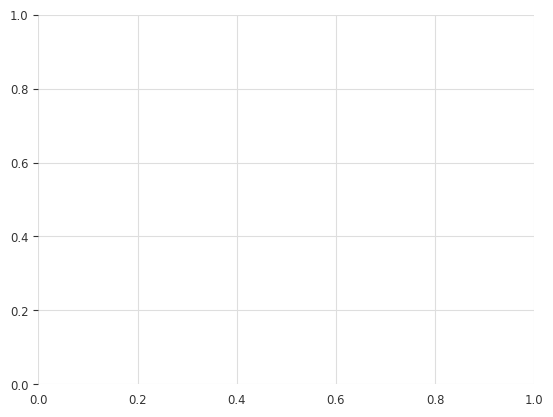

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

# timestamps = df['Timestamp']
# sensor_a = df['Voltage (V)']

# Apply Savitzky-Golay filter
# y_smooth = savgol_filter(sensor_a, window_length=30, polyorder=2, mode="nearest")

fig, ax = plt.subplots()
# ax.plot(df.index, y_smooth, label='Voltage (V)')
noisy = augmented[0][:1000]

# for column in df.columns:
    # if column != 'Elapsed time (minutes)':
        # df[column] = 
plt.plot(noisy['Elapsed time (minutes)'], noisy['Voltage (V)'])

# Format x-axis labels as time
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Smoothed Voltage (V)')
plt.legend()
plt.title('Smoothed Voltage (V) Data')

# Display the graph
plt.show()


In [90]:
import numpy as np
from darts import TimeSeries

augmented = []

# Assuming you have a Darts TimeSeries object named 'ts'

# Convert the TimeSeries to a pandas DataFrame
for ts in time_series_list:
    df = ts.pd_dataframe()

    # Add noise to the columns in the pandas DataFrame
    for column in df.columns:
        if column != 'Elapsed time (minutes)':
            noise_mean = 0
            noise_stddev = 0.1  # You can adjust this based on your desired noise level
            noise = np.random.normal(noise_mean, noise_stddev, len(df))
            df[column] = df[column] + noise

    # Convert the modified pandas DataFrame back to a Darts TimeSeries
    augmented.append(TimeSeries.from_dataframe(df))


In [5]:
df = time_series_list[0]

In [7]:
import pandas as pd
import numpy as np

def add_noise_to_time_series(time_series, noise_level):
    noise = np.random.normal(scale=noise_level, size=time_series.shape)
    noisy_time_series = time_series + noise
    return noisy_time_series

noise_level = 4  # Adjust the noise level according to your needs

# Convert DataFrame to NumPy array
temp = df
# temp = temp.drop('Timestamp', axis=1)
# temp = temp.drop('Elapsed time (minutes)', axis=1)
time_series = temp.values

# time_series = df.values
# print(time_series)

noisy_time_series = add_noise_to_time_series(time_series, noise_level)

# Convert the noisy_time_series values to strings
noisy_time_series = np.array(noisy_time_series, dtype=str)

# Concatenate the noisy_time_series with the original DataFrame
# noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns)

# noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns[0:])
# noisy_df['Timestamp'] = df['Timestamp']
# noisy_df['Elapsed time (minutes)'] = df['Elapsed time (minutes)']

print(noisy_df)

AttributeError: 'function' object has no attribute 'shape'

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from darts import TimeSeries
from darts.models import GaussianProcessFilter
from darts.utils import timeseries_generation as tg
import pandas as pd

In [2]:
import pandas as pd

df = pd.read_csv("magnetism.csv")
# df

In [3]:
df_filtered = df[df['Magnetism_ID'] == './T10/20190208_SMS.txt']
df_filtered
df = df_filtered

In [4]:
df = df.drop(['Magnetism_ID'], axis=1)
# df
# df.to_csv('CCR_edited.csv')

In [20]:
import pandas as pd
import numpy as np

def add_noise_to_time_series(time_series, noise_level):
    noise = np.random.normal(scale=noise_level, size=time_series.shape)
    noisy_time_series = time_series + noise
    return noisy_time_series

noise_level = 4  # Adjust the noise level according to your needs

# Convert DataFrame to NumPy array
temp = df
temp = temp.drop('Timestamp', axis=1)
temp = temp.drop('Elapsed time (minutes)', axis=1)
time_series = temp.values

# time_series = df.values
# print(time_series)

noisy_time_series = add_noise_to_time_series(time_series, noise_level)

# Convert the noisy_time_series values to strings
noisy_time_series = np.array(noisy_time_series, dtype=str)

# Concatenate the noisy_time_series with the original DataFrame
# noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns)

noisy_df = pd.DataFrame(noisy_time_series, columns=temp.columns[0:])
noisy_df['Timestamp'] = df['Timestamp']
noisy_df['Elapsed time (minutes)'] = df['Elapsed time (minutes)']

print(noisy_df)

             Set B field (T)          B field (T)   Ramp speed (T/min)  \
0         -3.896483833805611   2.5401554120351557    1.570573035467544   
1          -6.98608469532475   -3.182663991260383  -2.1205666924851694   
2          3.124297543338991   -9.327452366965876    0.528045323972348   
3         0.9086461031128436  0.07408904399603677  -1.4313489011064249   
4       -0.35010503435176427    2.770258513779359  -3.5191158790914994   
...                      ...                  ...                  ...   
111588    -8.711164565800654   -4.791950552843349   -4.840976094171882   
111589    2.9357203804279024   -4.417255990112772  -3.2839445110484644   
111590    1.1986948708632454  -2.3760926391751567  -1.5693929872245986   
111591   -2.4121845819086953   -4.173065950807189    0.301546739008508   
111592      3.16949921485631  -3.7139785545390795  -5.4393129896411505   

                Voltage (V) Inner Lower Temperature Outer Lower Temperature  \
0         4.094466610443092     

In [122]:
noisy_df = noisy_df.drop(['Timestamp'], axis=1)
time_series = TimeSeries.from_dataframe(noisy_df,)

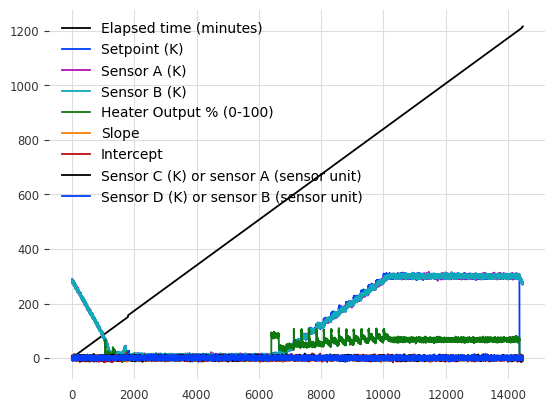

In [123]:
plt.plot(time_series['Elapsed time (minutes)'].pd_series(), label="Elapsed time (minutes)")
plt.plot(time_series['Setpoint (K)'].pd_series(), label="Setpoint (K)")
plt.plot(time_series['Sensor A (K)'].pd_series(), label="Sensor A (K)")
plt.plot(time_series['Sensor B (K)'].pd_series(), label="Sensor B (K)")
plt.plot(time_series['Heater Output % (0-100)'].pd_series(), label="Heater Output % (0-100)")
plt.plot(time_series['Slope'].pd_series(), label="Slope")
plt.plot(time_series['Intercept'].pd_series(), label="Intercept")
plt.plot(time_series['Sensor C (K) or sensor A (sensor unit)'].pd_series(), label="Sensor C (K) or sensor A (sensor unit)")
plt.plot(time_series['Sensor D (K) or sensor B (sensor unit)'].pd_series(), label="Sensor D (K) or sensor B (sensor unit)")

# plt.plot(pred.pd_series(), label= "forecast")
plt.legend()
plt.show()

# Dynamic Time Warping

# Feature Filtering 

In [ ]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Load your multivariate time series dataset into a pandas DataFrame
# Assuming your dataset is in a file called "magnetism.csv"
dataset = pd.read_csv('magnetism.csv')

# Preprocess your data if needed (e.g., handle missing values, resampling, etc.)

# Rename the columns if needed to match the expected format by tsfresh
# Assuming "Magnetism_ID" represents the time series and "Timestamp" represents the time of that data reading
preprocessed_data = dataset.rename(columns={'Magnetism_ID': 'id', 'Timestamp': 'time', 'Elapsed time (minutes)': 'value_2', 'Set B field (T)': 'value_3',
                                            'B field (T)': 'value_4', 'Ramp speed (T/min)': 'value_5', 'Voltage (V)': 'value_6',
                                            'Inner Lower Temperature': 'value_7', 'Outer Lower Temperature': 'value_8',
                                            'Inner Upper Temperature': 'value_9', 'Outer Upper Temperature': 'value_10',
                                            '1st Stage Temperature': 'value_11', 'Shield Temperature': 'value_12',
                                            '2nd Stage Temperature': 'value_13'})

# Concatenate "id" and "time" columns into a single identifier column
preprocessed_data['identifier'] = preprocessed_data['id'] + '_' + preprocessed_data['time'].astype(str)

# Reshape the data to long format for tsfresh
preprocessed_data_long = preprocessed_data.melt(id_vars='identifier', var_name='variable', value_name='value')

# Extract features using tsfresh
extracted_features = extract_features(preprocessed_data_long, column_id='identifier', column_value='value', column_kind='variable')

# Impute missing values in the extracted features (if any)
extracted_features = impute(extracted_features)

# Perform feature selection using tsfresh
# Assuming you want to select the top k features based on the p-value
selected_features = select_features(extracted_features, dataset['target'], fdr_level=0.05, ml_task='classification')


In [3]:
import pandas as pd
from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import impute

# Load your multivariate time series dataset into a pandas DataFrame
# Assuming your dataset is in a file called "magnetism.csv"
dataset = pd.read_csv('Data/CCR.csv')

# Preprocess your data if needed (e.g., handle missing values, resampling, etc.)

# Rename the columns if needed to match the expected format by tsfresh
# Assuming "Magnetism_ID" represents the time series and "Timestamp" represents the time of that data reading
preprocessed_data = dataset.rename(columns={'CCR_ID': 'id', 'Timestamp': 'time', 'Elapsed time (minutes)': 'value_2', 'Setpoint (K)': 'value_3',
                                            'Sensor A (K)': 'value_4', 'Sensor B (K)': 'value_5', 'Heater Output % (0-100)': 'value_6',
                                            'Heater Range (integer 0-5)': 'value_7', 'Slope': 'value_8',
                                            'Intercept': 'value_9', 'Sensor C (K) or Sensor A (sensor unit)': 'value_10',
                                            'Sensor D (K) or Sensor B (sensor unit)': 'value_11',})

# Concatenate "id" and "time" columns into a single identifier column
preprocessed_data['identifier'] = preprocessed_data['id'] + '_' + preprocessed_data['time'].astype(str)

# Reshape the data to long format for tsfresh
preprocessed_data_long = preprocessed_data.melt(id_vars='identifier', var_name='variable', value_name='value')

# Extract features using tsfresh
print("here")
extracted_features = extract_features(preprocessed_data_long, column_id='identifier', column_value='value', column_kind='variable')
print('here')
# Impute missing values in the extracted features (if any)
extracted_features = impute(extracted_features)

# Perform feature selection using tsfresh
# Assuming you want to select the top k features based on the p-value
selected_features = select_features(extracted_features, dataset['target'], fdr_level=0.05, ml_task='classification')


here


Feature Extraction:   0%|          | 0/30 [00:55<?, ?it/s]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Rearrange Column Order

# Savitsky-Golay Filter

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 
import pickle
from scipy.signal import savgol_filter

In [1]:
cd split

[Errno 2] No such file or directory: 'split'
/storage/rwp2/Pipeline/Preprocessing


In [9]:
with open('timeseries_1000','rb') as f: time_series_loaded = pickle.load(f)

In [3]:
df = time_series_loaded[0]

In [4]:
df = temp

NameError: name 'temp' is not defined

In [5]:
len(df)

1000

In [10]:
VAL_LEN = 4000 

In [12]:
temp = df
df = df[-VAL_LEN:]
df[0]

/storage/rwp2/.local/lib/python3.10/site-packages/darts/timeseries.py:4913: FutureWarning: DatetimeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if time_idx.is_integer() and not isinstance(time_idx, pd.RangeIndex):


<TimeSeries (DataArray) (Timestamp: 1, component: 12, sample: 1)>
array([[[ 3.6195400e-01],
        [ 0.0000000e+00],
        [ 2.9274998e-03],
        [ 9.1564998e-02],
        [-2.5000000e-02],
        [ 4.9609699e+00],
        [ 4.8982105e+00],
        [ 4.7678518e+00],
        [ 4.8450665e+00],
        [ 4.1727184e+01],
        [ 6.1183815e+01],
        [ 3.3310566e+00]]], dtype=float32)
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2019-02-19T12:55:00
  * component  (component) object 'Elapsed time (minutes)' ... '2nd Stage Tem...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [15]:
df[0].columns

Index(['Elapsed time (minutes)', 'Set B field (T)', 'B field (T)',
       'Ramp speed (T/min)', 'Voltage (V)', 'Inner Lower Temperature',
       'Outer Lower Temperature', 'Inner Upper Temperature',
       'Outer Upper Temperature', '1st Stage Temperature',
       'Shield Temperature', '2nd Stage Temperature'],
      dtype='object', name='component')

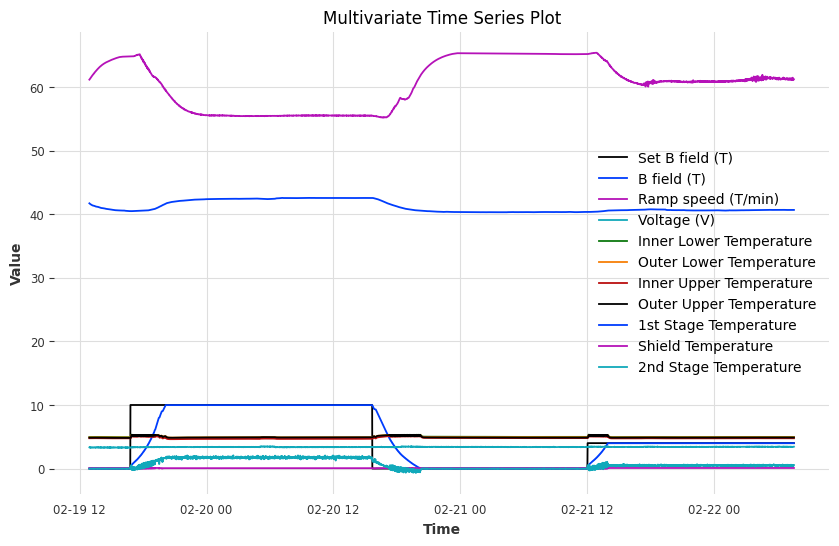

In [35]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
# df = (df).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    if column != 'Elapsed time (minutes)':
        plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Multivariate Time Series Plot')
plt.legend()
plt.grid(True)
plt.show()


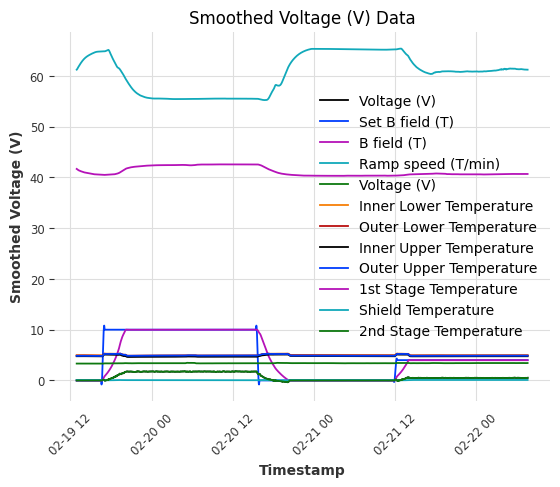

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

# timestamps = df['Timestamp']
sensor_a = df['Voltage (V)']

# Apply Savitzky-Golay filter
y_smooth = savgol_filter(sensor_a, window_length=30, polyorder=2, mode="nearest")

fig, ax = plt.subplots()
ax.plot(df.index, y_smooth, label='Voltage (V)')

for column in df.columns:
    if column != 'Elapsed time (minutes)':
        # df[column] = 
        plt.plot(df.index, savgol_filter(df[column], window_length=30, polyorder=2, mode = "nearest"), label=column)

# Format x-axis labels as time
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Smoothed Voltage (V)')
plt.legend()
plt.title('Smoothed Voltage (V) Data')

# Display the graph
plt.show()


In [41]:
time_series_loaded[0].columns

Index(['Elapsed time (minutes)', 'Set B field (T)', 'B field (T)',
       'Ramp speed (T/min)', 'Voltage (V)', 'Inner Lower Temperature',
       'Outer Lower Temperature', 'Inner Upper Temperature',
       'Outer Upper Temperature', '1st Stage Temperature',
       'Shield Temperature', '2nd Stage Temperature'],
      dtype='object', name='component')

In [44]:
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')

darts.timeseries.TimeSeries

In [10]:
# print(time_series_list_scaled[0].columns)
from darts import TimeSeries
filtered = []
# Assuming you have a Darts TimeSeries object named 'ts'

# Convert the TimeSeries to a pandas DataFrame
for ts in time_series_loaded:
    df = ts.pd_dataframe()

    # Rename the columns in the pandas DataFrame
    # df.columns = new_column_names
    for column in df.columns:
        # print(column)
        if column != 'Elapsed time (minutes)':
            # temp[column] = savgol_filter(df[column], window_length=30, polyorder=2, mode = "nearest")
            filtered_values = savgol_filter(df[column], window_length=30, polyorder=2, mode="nearest")
            df[column] = filtered_values
    

    # Convert the modified pandas DataFrame back to a Darts TimeSeries
    filtered.append(TimeSeries.from_dataframe(df))


In [11]:
print(filtered[0])

<TimeSeries (DataArray) (Timestamp: 1000, component: 12, sample: 1)>
array([[[3.6195400e-01],
        [0.0000000e+00],
        [2.9050077e-03],
        ...,
        [4.1685795e+01],
        [6.1245068e+01],
        [3.3216629e+00]],

       [[1.0680401e+00],
        [0.0000000e+00],
        [2.8648460e-03],
        ...,
        [4.1673203e+01],
        [6.1267361e+01],
        [3.3215742e+00]],

       [[2.0418947e+00],
        [0.0000000e+00],
        [2.8484729e-03],
        ...,
...
        ...,
        [4.2416637e+01],
        [5.5460644e+01],
        [3.4446325e+00]],

       [[9.9797980e+02],
        [1.0000000e+01],
        [9.9829264e+00],
        ...,
        [4.2415646e+01],
        [5.5458374e+01],
        [3.4434059e+00]],

       [[9.9898755e+02],
        [1.0000000e+01],
        [9.9829464e+00],
        ...,
        [4.2414700e+01],
        [5.5457245e+01],
        [3.4407392e+00]]], dtype=float32)
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2019-02-19T12:55:00

In [58]:
pwd

'/storage/rwp2/Pipeline/Preprocessing'

In [60]:
df.columns

Index(['Elapsed time (minutes)', 'Set B field (T)', 'B field (T)',
       'Ramp speed (T/min)', 'Voltage (V)', 'Inner Lower Temperature',
       'Outer Lower Temperature', 'Inner Upper Temperature',
       'Outer Upper Temperature', '1st Stage Temperature',
       'Shield Temperature', '2nd Stage Temperature'],
      dtype='object', name='component')

In [66]:
df.index()

/storage/rwp2/.local/lib/python3.10/site-packages/darts/timeseries.py:4913: FutureWarning: DatetimeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if time_idx.is_integer() and not isinstance(time_idx, pd.RangeIndex):


AttributeError: 'TimeSeries' object has no attribute 'index'

AttributeError: 'TimeSeries' object has no attribute 'index'

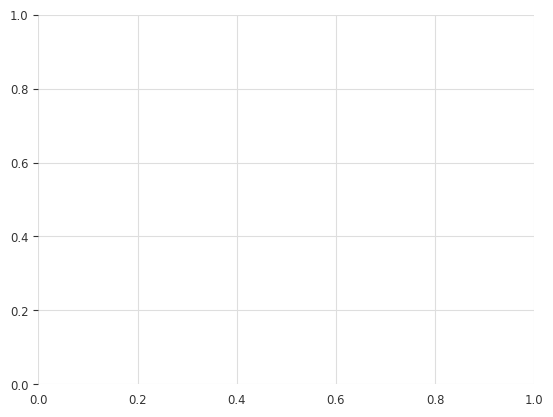

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
df = filtered[0]
# timestamps = df['Timestamp']
sensor_a = df['Voltage (V)']

# Apply Savitzky-Golay filter
# y_smooth = savgol_filter(sensor_a, window_length=30, polyorder=2, mode="nearest")

fig, ax = plt.subplots()
# ax.plot(df.index, y_smooth, label='Voltage (V)')


for column in df.columns:
    if column != 'Elapsed time (minutes)':
        # df[column] = 
        plt.plot(df.index, df[column], label=column)

# Format x-axis labels as time
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Smoothed Voltage (V)')
plt.legend()
plt.title('Smoothed Voltage (V) Data')

# Display the graph
plt.show()


In [13]:
import pickle
with open('timeseries_1000_filtered','wb') as f: pickle.dump(filtered, f)

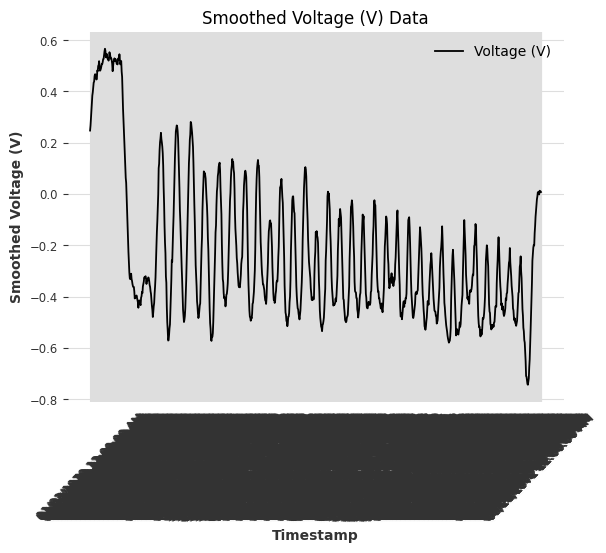

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter

timestamps = df['Timestamp']
sensor_a = df['Voltage (V)']

# Apply Savitzky-Golay filter
y_smooth = savgol_filter(sensor_a, window_length=30, polyorder=2, mode="nearest")

fig, ax = plt.subplots()
ax.plot(timestamps, y_smooth, label='Voltage (V)')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y %I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title if needed
plt.xlabel('Timestamp')
plt.ylabel('Smoothed Voltage (V)')
plt.legend()
plt.title('Smoothed Voltage (V) Data')

# Display the graph
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

fig, ax = plt.subplots(4, figsize=(8, 14))
window_sizes = [100, 200, 300]
i = 0

window_length = 5
polyorder = 2

# Apply the Savitzky-Golay filter to the selected column
filtered_data = savgol_filter(df[data_column], window_length, polyorder)

for w_size in window_sizes:
    y_fit = savgol_filter(sensor_a, w_size, 3)
    ax[i].plot(timestamps, sensor_a, label="Sensor A (K)", color="green")
    ax[i].plot(timestamps, y_fit, label="Smoothed Sensor A (K)", color="red")
    ax[i].set_title("Window size: " + str(w_size))
    ax[i].legend()
    ax[i].grid(True)
    i += 1

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.signal import savgol_filter

# Read the CSV data into a pandas DataFrame
input_csv_file = 'input_data.csv'
output_csv_file = 'output_data.csv'
df = pd.read_csv(input_csv_file)

# Set the column containing the data you want to filter
data_column = 'Value'  # Replace 'Value' with the actual column name

# Set the parameters for the Savitzky-Golay filter
window_length = 5
polyorder = 2

# Apply the Savitzky-Golay filter to the selected column
filtered_data = savgol_filter(df[data_column], window_length, polyorder)

# Add the filtered data back to the DataFrame
df['Filtered_' + data_column] = filtered_data

# Save the DataFrame with the filtered data to a new CSV file
df.to_csv(output_csv_file, index=False)

print("Savitzky-Golay filter applied and saved to", output_csv_file)


# Feature Engineering

In [24]:
import pandas as pd

In [63]:
import pandas as pd

def split_data_by_id(df, id_column, chunk_size):
    grouped_data = df.groupby(id_column)
    chunks = []

    for _, group in grouped_data:
        num_chunks = len(group) // chunk_size
        if num_chunks == 0:
            chunks.append(group)
        else:
            for i in range(num_chunks):
                chunks.append(group.iloc[i*chunk_size:(i+1)*chunk_size])

            remainder = len(group) % chunk_size
            if remainder > 0:
                chunks.append(group.iloc[-remainder:])

    return chunks

# Replace 'your_file.csv' with the path to your CSV file
csv_file = 'magnetism.csv'
# Replace 'id_column_name' with the column name that denotes the ID in the CSV file
id_column_name = 'Magnetism_ID'
chunk_size = 600

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Split the data into chunks based on the specified ID column and chunk size
data_chunks = split_data_by_id(df, id_column_name, chunk_size)

# Now data_chunks is a list of DataFrames, each containing up to 600 records for the corresponding ID.
# You can access each chunk of data using standard list indexing.
# For example, to access the first chunk:
first_chunk = data_chunks[0]


FileNotFoundError: [Errno 2] No such file or directory: 'magnetism.csv'